In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
import awkward as ak
import scipy
import ROOT
sys.path.insert(0,"../")


Welcome to JupyROOT 6.30/07


In [2]:
sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import ABCD_FirstStudy_Helper
import Processing_Helpers
import analysis_helpers


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [ ]:
### NOTE: for this sample in data, the tau energy branch is messed up ###
data_path_base = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels/"

data_samples = ["Muon0-Run2024B-PromptReco-v1",
    "Muon0-Run2024C-PromptReco-v1",
    "Muon0-Run2024D-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v2",
    "Muon0-Run2024F-PromptReco-v1",
    "Muon0-Run2024G-PromptReco-v1",
    "Muon0-Run2024H-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v2",
    "Muon1-Run2024B-PromptReco-v1",
    "Muon1-Run2024C-PromptReco-v1",
    "Muon1-Run2024D-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v2",
    "Muon1-Run2024F-PromptReco-v1",
    "Muon1-Run2024G-PromptReco-v1",
    "Muon1-Run2024H-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v2"
    ]

data_events_list = [data_path_base+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events  = MuonSystemReader.loadTree_nanoFactory(data_events_list)


/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=20>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=20>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


In [4]:
importlib.reload(MuonSystemReader)
importlib.reload(ABCD_FirstStudy_Helper)
#importlib.reload(Processing_Helpers)

<module 'ABCD_FirstStudy_Helper' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/ABCD_FirstStudy_Helper.py'>

In [5]:
clusterSize, dPhi = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

Text(0, 0.5, 'd$\\phi$(cluster, tau)')

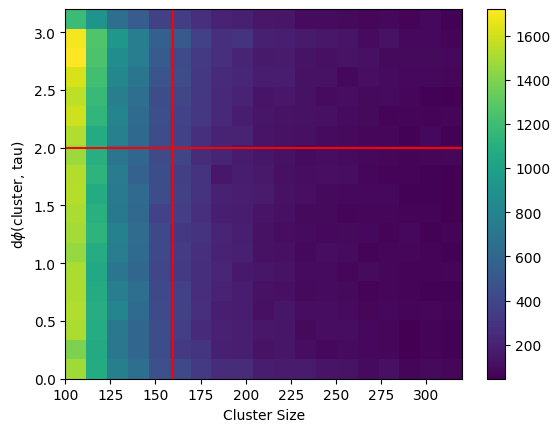

In [6]:

xedges = np.linspace(100, 320, 20)
y_edges = np.linspace(0, 3.2, 20)
counts, x_edges, y_edges, im = plt.hist2d(list(clusterSize), list(dPhi), bins=[xedges, y_edges], cmap='viridis')
plt.axvline(160, color='red')
plt.axhline(2, color='red')
plt.colorbar(im)
plt.xlabel("Cluster Size")
plt.ylabel("d$\phi$(cluster, tau)")

In [7]:
#check closure
B = ak.count_nonzero((dPhi<2) & (clusterSize>160))
C = ak.count_nonzero((dPhi>2) & (clusterSize<160))
A = ak.count_nonzero((dPhi<2) & (clusterSize<160))
D_exp = B/A*C
A_unc = np.sqrt(A)
B_unc = np.sqrt(B)
C_unc = np.sqrt(C)
D_exp_unc = D_exp * np.sqrt((A_unc/A)**2+(B_unc/B)**2 + (C_unc/C)**2)
print(f"low hits low dPhi {A} +- {A_unc}")
print(f"high hits low dPhi {B} +- {B_unc}")
print(f"low hits high dPhi {C} +- {C_unc}")
print(f"expected for SR {D_exp} +- {D_exp_unc}")

low hits low dPhi 52448 +- 229.01528333279418
high hits low dPhi 29456 +- 171.62750362339946
low hits high dPhi 33429 +- 182.8359920803341
expected for SR 18774.493288590606 +- 170.9712105393456


In [8]:
D = ak.count_nonzero((dPhi>2) & (clusterSize>160))
D_unc = np.sqrt(D)
print(f"SR observed {D} +- {D_unc}")

SR observed 20195 +- 142.10911300827965


In [9]:
np.cov(clusterSize, dPhi)

<Array [[1.32e+04, 1.05], [1.05, 0.867]] type='2 * 2 * float64'>

(array([13415., 12913., 12707., 12738., 12828., 12965., 13015., 13752.,
        15068., 16767.]),
 array([3.56435776e-05, 3.14188749e-01, 6.28341854e-01, 9.42494988e-01,
        1.25664806e+00, 1.57080126e+00, 1.88495433e+00, 2.19910741e+00,
        2.51326060e+00, 2.82741356e+00, 3.14156675e+00]),
 <BarContainer object of 10 artists>)

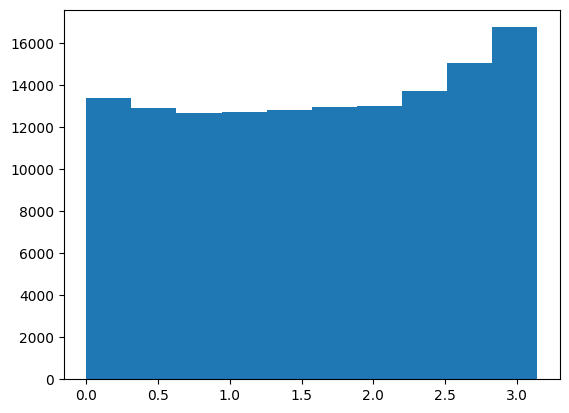

In [10]:
plt.hist(dPhi)

### With additional cuts

### With additional cuts but no StatonVeto/DNN

In [5]:
importlib.reload(MuonSystemReader)
importlib.reload(ABCD_FirstStudy_Helper)
#importlib.reload(Processing_Helpers)

<module 'ABCD_FirstStudy_Helper' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/ABCD_FirstStudy_Helper.py'>

In [6]:
clusterSize_allCutsDNN0, dPhi_allCutsDNN0 = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, DNN_cut=0)
clusterSize_allCutsDNN0MT, dPhi_allCutsDNN0MT = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsMedium', failID = 'tauIsTight', blind=False, DNN_cut=0)
clusterSize_allCutsDNN0SR, dPhi_allCutsDNN0SR = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsTight', failID = None, blind=False, DNN_cut=0)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40879 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37035 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43493 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
   

In [7]:
print(len(clusterSize_allCutsDNN0))
print(len(clusterSize_allCutsDNN0MT))

print("in bin A")
print(f"bin A VR1: {ak.count_nonzero((clusterSize_allCutsDNN0>160) & (dPhi_allCutsDNN0>2))}")
print(f"bin A VR2: {ak.count_nonzero((clusterSize_allCutsDNN0MT>160) & (dPhi_allCutsDNN0MT>2))}")


22499
12162
in bin A
bin A VR1: 4498
bin A VR2: 2409


### Station12 Veto Loose to Medium

In [14]:
clusterSize_allCuts, dPhi_allCuts = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelections(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

Text(0, 0.5, 'd$\\phi$(cluster, tau)')

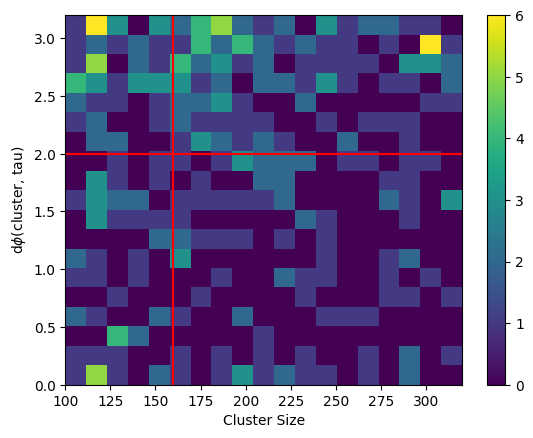

In [15]:

xedges = np.linspace(100, 320, 20)
y_edges = np.linspace(0, 3.2, 20)
counts, x_edges, y_edges, im = plt.hist2d(list(clusterSize_allCuts), list(dPhi_allCuts), bins=[xedges, y_edges], cmap='viridis')
plt.axvline(160, color='red')
plt.axhline(2, color='red')
plt.colorbar(im)
plt.xlabel("Cluster Size")
plt.ylabel("d$\phi$(cluster, tau)")

In [16]:
#check closure
B = ak.count_nonzero((dPhi_allCuts<2) & (clusterSize_allCuts>160))
C = ak.count_nonzero((dPhi_allCuts>2) & (clusterSize_allCuts<160))
A = ak.count_nonzero((dPhi_allCuts<2) & (clusterSize_allCuts<160))
D_exp = B/A*C
A_unc = np.sqrt(A)
B_unc = np.sqrt(B)
C_unc = np.sqrt(C)
D_exp_unc = D_exp * np.sqrt((A_unc/A)**2+(B_unc/B)**2 + (C_unc/C)**2)
print(f"low hits low dPhi {A} +- {A_unc}")
print(f"high hits low dPhi {B} +- {B_unc}")
print(f"low hits high dPhi {C} +- {C_unc}")
print(f"expected for SR {D_exp} +- {D_exp_unc}")

low hits low dPhi 53 +- 7.280109889280518
high hits low dPhi 184 +- 13.564659966250536
low hits high dPhi 59 +- 7.681145747868608
expected for SR 204.83018867924528 +- 41.6021457273703


In [17]:
D = ak.count_nonzero((dPhi_allCuts>2) & (clusterSize_allCuts>160))
D_unc = np.sqrt(D)
print(f"SR observed {D} +- {D_unc}")

SR observed 245 +- 15.652475842498529


In [18]:
scipy.stats.pearsonr(clusterSize_allCuts, dPhi_allCuts)

PearsonRResult(statistic=0.0022687407758026053, pvalue=0.957779661983603)

In [19]:
np.cov(clusterSize_allCuts, dPhi_allCuts)

<Array [[3.41e+04, 0.391], [0.391, 0.873]] type='2 * 2 * float64'>

### Station12Veto with Medium to Tight

In [21]:
clusterSize_allCutsMT, dPhi_allCutsMT = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelections(data_events, passID = 'tauIsMedium', failID = 'tauIsTight', blind=False)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37087 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-083

Text(0, 0.5, 'd$\\phi$(cluster, tau)')

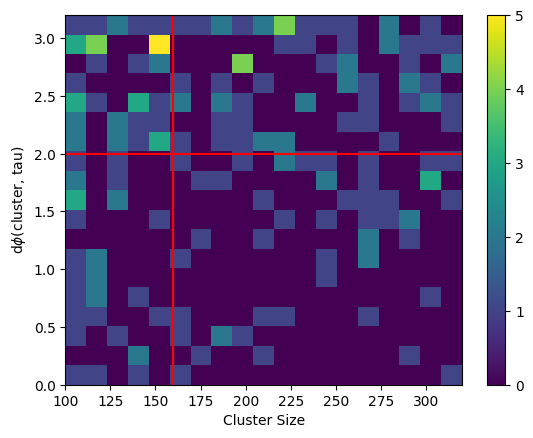

In [22]:

xedges = np.linspace(100, 320, 20)
y_edges = np.linspace(0, 3.2, 20)
counts, x_edges, y_edges, im = plt.hist2d(list(clusterSize_allCutsMT), list(dPhi_allCutsMT), bins=[xedges, y_edges], cmap='viridis')
plt.axvline(160, color='red')
plt.axhline(2, color='red')
plt.colorbar(im)
plt.xlabel("Cluster Size")
plt.ylabel("d$\phi$(cluster, tau)")

In [23]:
#check closure
B = ak.count_nonzero((dPhi_allCutsMT<2) & (clusterSize_allCutsMT>160))
C = ak.count_nonzero((dPhi_allCutsMT>2) & (clusterSize_allCutsMT<160))
A = ak.count_nonzero((dPhi_allCutsMT<2) & (clusterSize_allCutsMT<160))
D_exp = B/A*C
A_unc = np.sqrt(A)
B_unc = np.sqrt(B)
C_unc = np.sqrt(C)
D_exp_unc = D_exp * np.sqrt((A_unc/A)**2+(B_unc/B)**2 + (C_unc/C)**2)
print(f"low hits low dPhi {A} +- {A_unc}")
print(f"high hits low dPhi {B} +- {B_unc}")
print(f"low hits high dPhi {C} +- {C_unc}")
print(f"expected for SR {D_exp} +- {D_exp_unc}")

low hits low dPhi 33 +- 5.744562646538029
high hits low dPhi 109 +- 10.44030650891055
low hits high dPhi 45 +- 6.708203932499369
expected for SR 148.63636363636365 +- 36.92037648575292


In [24]:
D = ak.count_nonzero((dPhi_allCutsMT>2) & (clusterSize_allCutsMT>160))
D_unc = np.sqrt(D)
print(f"SR observed {D} +- {D_unc}")

SR observed 137 +- 11.704699910719626


In [25]:
scipy.stats.pearsonr(clusterSize_allCutsMT, dPhi_allCutsMT)

PearsonRResult(statistic=-0.04602555152345221, pvalue=0.40897674324768873)

In [26]:
np.cov(clusterSize_allCutsMT, dPhi_allCutsMT)

<Array [[3.54e+04, -7.63], [-7.63, 0.775]] type='2 * 2 * float64'>

### With DNN Score

### DNN Veto Loose to Medium

In [27]:
importlib.reload(MuonSystemReader)
importlib.reload(ABCD_FirstStudy_Helper)
#importlib.reload(Processing_Helpers)

<module 'ABCD_FirstStudy_Helper' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/ABCD_FirstStudy_Helper.py'>

In [28]:
clusterSize_allCutsDNN, dPhi_allCutsDNN = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, DNN_cut=0.99975)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41137 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-083

Text(0, 0.5, 'd$\\phi$(cluster, tau)')

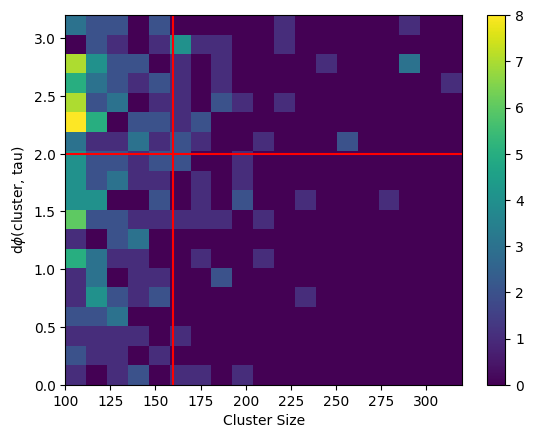

In [29]:
xedges = np.linspace(100, 320, 20)
y_edges = np.linspace(0, 3.2, 20)
counts, x_edges, y_edges, im = plt.hist2d(list(clusterSize_allCutsDNN), list(dPhi_allCutsDNN), bins=[xedges, y_edges], cmap='viridis')
plt.axvline(160, color='red')
plt.axhline(2, color='red')
plt.colorbar(im)
plt.xlabel("Cluster Size")
plt.ylabel("d$\phi$(cluster, tau)")

In [30]:
#check closure
B = ak.count_nonzero((dPhi_allCutsDNN<2) & (clusterSize_allCutsDNN>160))
C = ak.count_nonzero((dPhi_allCutsDNN>2) & (clusterSize_allCutsDNN<160))
A = ak.count_nonzero((dPhi_allCutsDNN<2) & (clusterSize_allCutsDNN<160))
D_exp = B/A*C
A_unc = np.sqrt(A)
B_unc = np.sqrt(B)
C_unc = np.sqrt(C)
D_exp_unc = D_exp * np.sqrt((A_unc/A)**2+(B_unc/B)**2 + (C_unc/C)**2)
print(f"low hits low dPhi {A} +- {A_unc}")
print(f"high hits low dPhi {B} +- {B_unc}")
print(f"low hits high dPhi {C} +- {C_unc}")
print(f"expected for SR {D_exp} +- {D_exp_unc}")

low hits low dPhi 96 +- 9.797958971132712
high hits low dPhi 27 +- 5.196152422706632
low hits high dPhi 80 +- 8.94427190999916
expected for SR 22.5 +- 5.509225217759754


In [31]:
D = ak.count_nonzero((dPhi_allCutsDNN>2) & (clusterSize_allCutsDNN>160))
D_unc = np.sqrt(D)
print(f"SR observed {D} +- {D_unc}")

SR observed 35 +- 5.916079783099616


In [32]:
scipy.stats.pearsonr(clusterSize_allCutsDNN, dPhi_allCutsDNN)

PearsonRResult(statistic=0.032262345295026695, pvalue=0.6189590529088042)

In [33]:
np.cov(clusterSize_allCutsDNN, dPhi_allCutsDNN)

<Array [[6.02e+03, 2.12], [2.12, 0.719]] type='2 * 2 * float64'>

### Medium to Tight

In [34]:
clusterSize_allCutsDNNMT, dPhi_allCutsDNNMT = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsMedium', failID = 'tauIsTight', blind=False, DNN_cut=0.99975)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38893 instead
  warnings.warn(


/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

Text(0, 0.5, 'd$\\phi$(cluster, tau)')

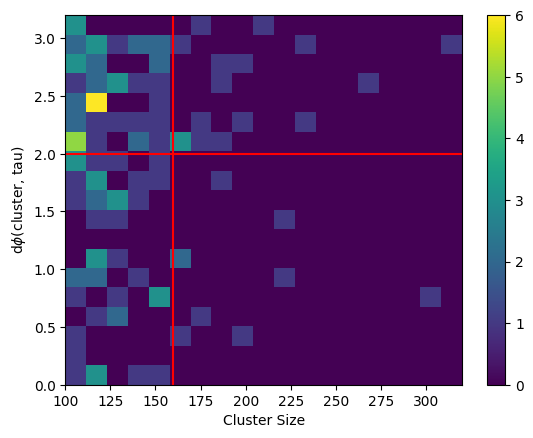

In [35]:
xedges = np.linspace(100, 320, 20)
y_edges = np.linspace(0, 3.2, 20)
counts, x_edges, y_edges, im = plt.hist2d(list(clusterSize_allCutsDNNMT), list(dPhi_allCutsDNNMT), bins=[xedges, y_edges], cmap='viridis')
plt.axvline(160, color='red')
plt.axhline(2, color='red')
plt.colorbar(im)
plt.xlabel("Cluster Size")
plt.ylabel("d$\phi$(cluster, tau)")

In [36]:
#check closure
B = ak.count_nonzero((dPhi_allCutsDNNMT<2) & (clusterSize_allCutsDNNMT>160))
C = ak.count_nonzero((dPhi_allCutsDNNMT>2) & (clusterSize_allCutsDNNMT<160))
A = ak.count_nonzero((dPhi_allCutsDNNMT<2) & (clusterSize_allCutsDNNMT<160))
D_exp = B/A*C
A_unc = np.sqrt(A)
B_unc = np.sqrt(B)
C_unc = np.sqrt(C)
D_exp_unc = D_exp * np.sqrt((A_unc/A)**2+(B_unc/B)**2 + (C_unc/C)**2)
print(f"low hits low dPhi {A} +- {A_unc}")
print(f"high hits low dPhi {B} +- {B_unc}")
print(f"low hits high dPhi {C} +- {C_unc}")
print(f"expected for SR {D_exp} +- {D_exp_unc}")

low hits low dPhi 45 +- 6.708203932499369
high hits low dPhi 8 +- 2.8284271247461903
low hits high dPhi 53 +- 7.280109889280518
expected for SR 9.422222222222222 +- 3.839947416192322


In [37]:
D = ak.count_nonzero((dPhi_allCutsDNNMT>2) & (clusterSize_allCutsDNNMT>160))
D_unc = np.sqrt(D)
print(f"SR observed {D} +- {D_unc}")

SR observed 19 +- 4.358898943540674


In [38]:
scipy.stats.pearsonr(clusterSize_allCutsDNNMT, dPhi_allCutsDNNMT)

PearsonRResult(statistic=0.08128207784209497, pvalue=0.36557438383297924)

In [39]:
np.cov(clusterSize_allCutsDNNMT, dPhi_allCutsDNNMT)

<Array [[2.48e+03, 3.5], [3.5, 0.747]] type='2 * 2 * float64'>

### Check Number of Events in each VR/After Each Cut

In [19]:
print("VR1 precuts", len(clusterSize_allCutsDNN0))
print("VR2 precuts", len(clusterSize_allCutsDNN0MT))
print("SR precuts", len(clusterSize_allCutsDNN0SR))
# print("VR1 Station12Veto", len(clusterSize_allCuts))
# print("VR2 Station12Veto", len(clusterSize_allCutsMT))
# print("VR1 DNNCut", len(clusterSize_allCutsDNN))
# print("VR2 DNNCut", len(clusterSize_allCutsDNNMT))


VR1 precuts 22499
VR2 precuts 12162
SR precuts 14648


### Make Profile

In [41]:
h2d = ROOT.TH2D("With DNN>0.99975", "ABCD in Loose-Medium Tau ID VR;ClusterSize;DeltaPhi(cluster, tau)", 20, 100, 320, 20, 0, 3.2)
for x, y in zip(clusterSize_allCutsDNN, dPhi_allCutsDNN):
    h2d.Fill(x,y)

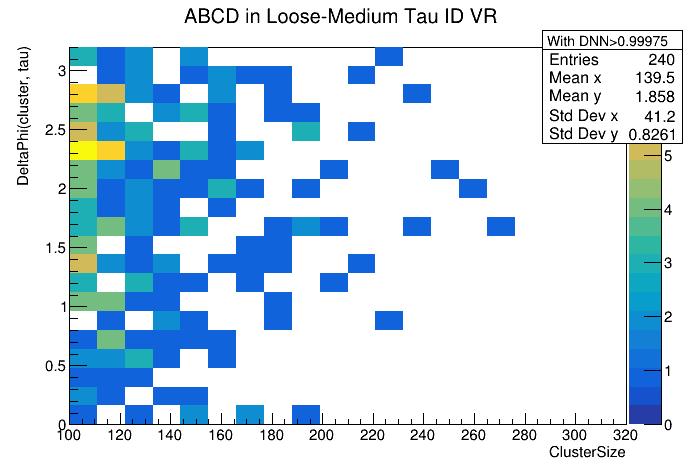

In [42]:
c = ROOT.TCanvas()
h2d.Draw("profcolz")
c.Draw()

In [43]:
h2dMT = ROOT.TH2D("With DNN>0.99975", "ABCD in Medium-Tight Tau ID VR;ClusterSize;DeltaPhi(cluster, tau)", 20, 100, 320, 20, 0, 3.2)
for x, y in zip(clusterSize_allCutsDNNMT, dPhi_allCutsDNNMT):
    h2dMT.Fill(x,y)

Warning in <TROOT::Append>: Replacing existing TH1: With DNN>0.99975 (Potential memory leak).


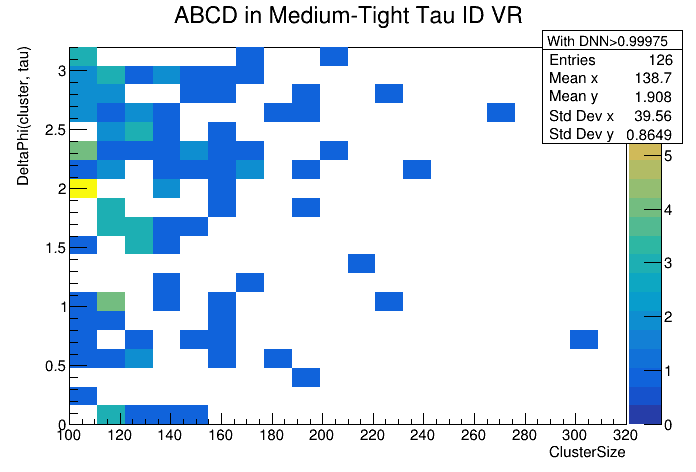

In [44]:
c = ROOT.TCanvas()
h2dMT.Draw("profcolz")
c.Draw()

In [45]:
from ROOT import gStyle
# del h2d_profx
# del h2dMT_profx
h2d_profx = h2d.ProfileX()
h2d_profx.SetLineColor(ROOT.kRed)
#gStyle.SetOptStat(0)
h2d_profx.Rebin(2)

h2dMT_profx = h2dMT.ProfileX()
h2dMT_profx.SetLineColor(ROOT.kBlue)
h2dMT_profx.Rebin(2)

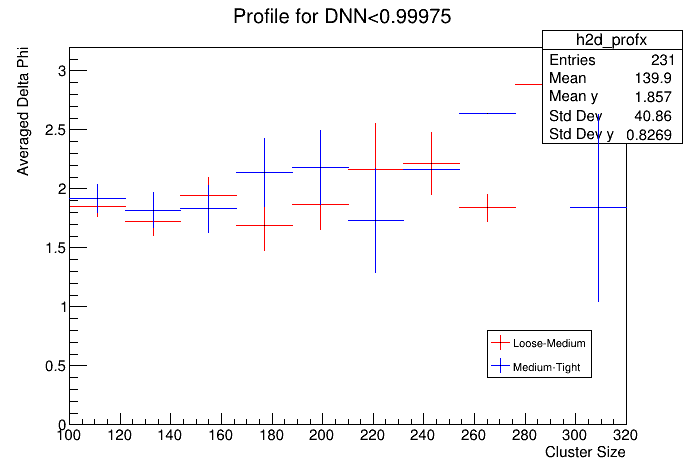

In [46]:
c = ROOT.TCanvas()
from ROOT import gStyle

h2d_profx = h2d.ProfileX("h2d_profx")
h2d_profx.SetLineColor(ROOT.kRed)
#gStyle.SetOptStat(0)
h2d_profx.Rebin(2)

h2dMT_profx = h2dMT.ProfileX("h2dMT_profx")
h2dMT_profx.SetLineColor(ROOT.kBlue)
h2dMT_profx.Rebin(2)

h2d_profx.Draw()
h2d_profx.GetYaxis().SetRangeUser(0,3.2)
h2d_profx.SetTitle("Profile for DNN<0.99975;Cluster Size;Averaged Delta Phi")

h2dMT_profx.Draw("SAME")

leg = ROOT.TLegend(0.7, 0.2, 0.85, 0.3)
leg.AddEntry(h2d_profx, "Loose-Medium", "lep")
leg.AddEntry(h2dMT_profx, "Medium-Tight", "lep")
leg.Draw("SAME")

c.Draw()

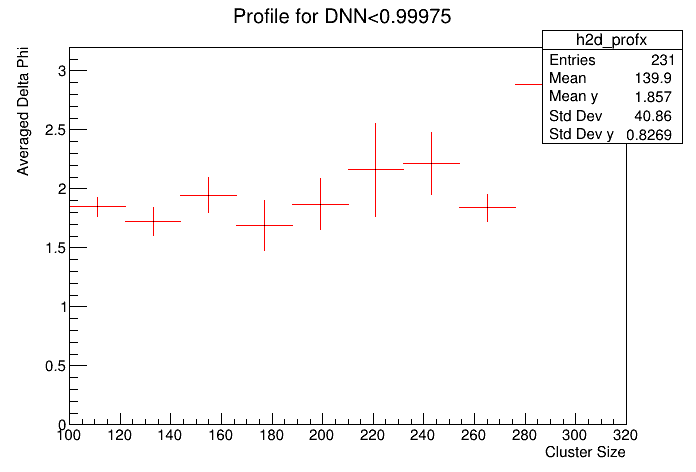

In [47]:
# c = ROOT.TCanvas()
# from ROOT import gStyle

# h2d_profx = h2d.ProfileX()
# h2d_profx.SetLineColor(ROOT.kRed)
# #gStyle.SetOptStat(0)
# h2d_profx.Rebin(2)

# h2dMT_profx = h2dMT.ProfileX()
# h2dMT_profx.SetLineColor(ROOT.kBlue)
# h2dMT_profx.Rebin(2)

# h2d_profx.Draw()
# h2dMT_profx.GetYaxis().SetRangeUser(0,3.2)
# h2dMT_profx.SetTitle("Profile for DNN<0.99975;Cluster Size;Averaged Delta Phi")


h2d_profx.Draw()

# # leg = ROOT.TLegend(0.6, 0.2, 0.8, 0.4)
# # leg.AddEntry(h2d_profx, "VR1", "lep")
# # leg.AddEntry(h2dMT_profx, "VR2", "lep")
# # leg.Draw("SAME")

c.Draw()

In [48]:
h2dStationVeto = ROOT.TH2D("With No hits Station1/2+NStation10>1", "ABCD in Loose-Medium Tau ID VR;ClusterSize;DeltaPhi(cluster, tau)", 20, 100, 320, 20, 0, 3.2)
for x, y in zip(clusterSize_allCuts, dPhi_allCuts):
    h2dStationVeto.Fill(x,y)

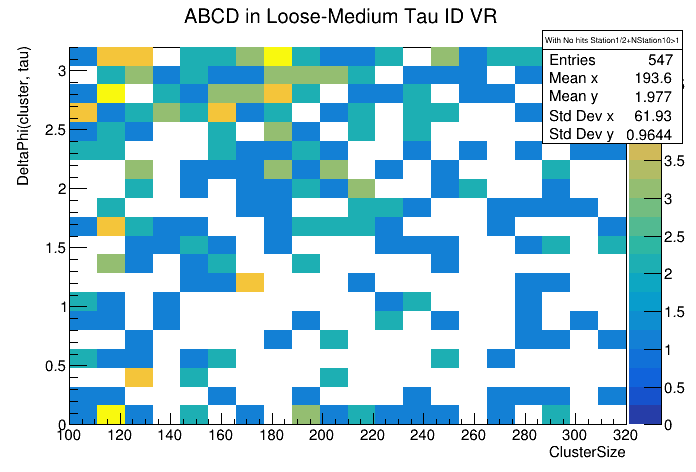

In [49]:
c = ROOT.TCanvas()
h2dStationVeto.Draw("profcolz")
c.Draw()

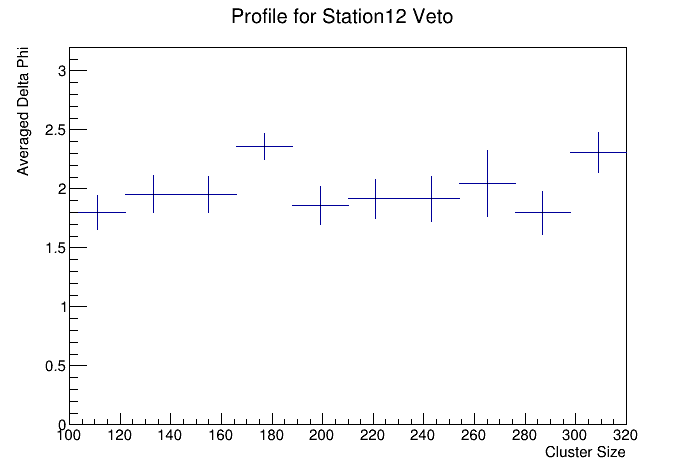

In [50]:
from ROOT import gStyle
h2d_profx_StationVeto = h2dStationVeto.ProfileX()
gStyle.SetOptStat(0)
h2d_profx_StationVeto.Rebin(2)
c = ROOT.TCanvas()
h2d_profx_StationVeto.Draw()
h2d_profx_StationVeto.GetYaxis().SetRangeUser(0,3.2)
h2d_profx_StationVeto.SetTitle("Profile for Station12 Veto;Cluster Size;Averaged Delta Phi")
c.Draw()

In [51]:
h2dStationVetoMT = ROOT.TH2D("With No hits Station1/2+NStation10>1", "ABCD in Medium-Tight Tau ID VR;ClusterSize;DeltaPhi(cluster, tau)", 20, 100, 320, 20, 0, 3.2)
for x, y in zip(clusterSize_allCutsMT, dPhi_allCutsMT):
    h2dStationVetoMT.Fill(x,y)

Warning in <TROOT::Append>: Replacing existing TH1: With No hits Station1/2+NStation10>1 (Potential memory leak).


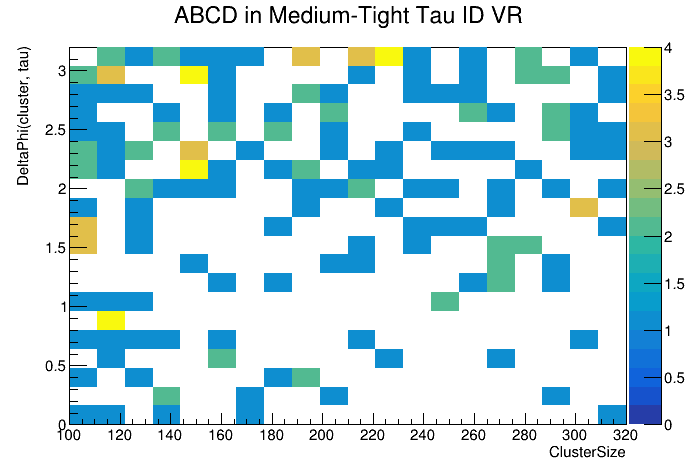

In [52]:
c = ROOT.TCanvas()
h2dStationVetoMT.Draw("profcolz")
c.Draw()

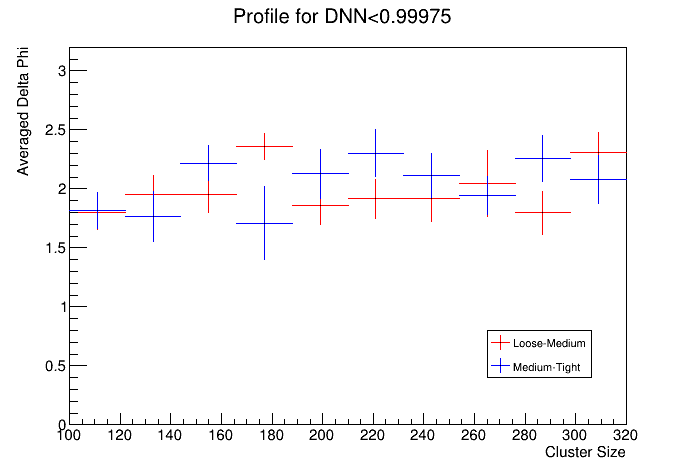

In [53]:
c = ROOT.TCanvas()
from ROOT import gStyle

h2d_profx_StationVeto = h2dStationVeto.ProfileX("h2d_profx_StationVeto")
h2d_profx_StationVeto.SetLineColor(ROOT.kRed)
#gStyle.SetOptStat(0)
h2d_profx_StationVeto.Rebin(2)

h2dMT_profx_StationVeto = h2dStationVetoMT.ProfileX("h2dMT_profx_StationVeto")
h2dMT_profx_StationVeto.SetLineColor(ROOT.kBlue)
h2dMT_profx_StationVeto.Rebin(2)


h2d_profx_StationVeto.Draw()
h2d_profx_StationVeto.GetYaxis().SetRangeUser(0,3.2)
h2d_profx_StationVeto.SetTitle("Profile for DNN<0.99975;Cluster Size;Averaged Delta Phi")

h2dMT_profx_StationVeto.Draw("SAME")

leg = ROOT.TLegend(0.7, 0.2, 0.85, 0.3)
leg.AddEntry(h2d_profx_StationVeto, "Loose-Medium", "lep")
leg.AddEntry(h2dMT_profx_StationVeto, "Medium-Tight", "lep")
leg.Draw("SAME")

c.Draw()

### Checking cluster size distribution in different VRs and with differents cuts

In [54]:
importlib.reload(analysis_helpers)

<module 'analysis_helpers' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/analysis_helpers.py'>

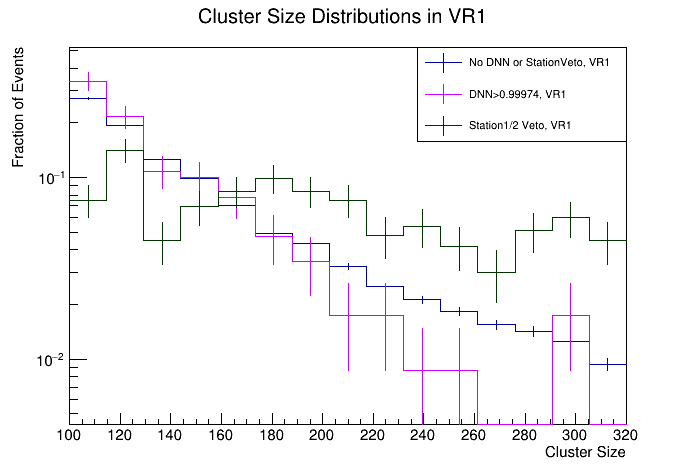

In [55]:
c = ROOT.TCanvas()
leg = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)


#no additional cuts VR1
noAdditionalCuts_VR1 = analysis_helpers.get_ROOT_hist_from_ak(clusterSize_allCutsDNN0, xlow=100, xhigh=320, nbins=15)

noAdditionalCuts_VR1.Scale(1/noAdditionalCuts_VR1.GetSumOfWeights())
noAdditionalCuts_VR1.SetTitle("Cluster Size Distributions in VR1;Cluster Size; Fraction of Events")
noAdditionalCuts_VR1.Draw("HIST E")
leg.AddEntry(noAdditionalCuts_VR1, "No DNN or StationVeto, VR1", "lep")
noAdditionalCuts_VR1.SetDirectory(0)

# #no additional cuts VR2
# noAdditionalCuts_VR2 = analysis_helpers.get_ROOT_hist_from_ak(clusterSize_allCutsDNN0MT, xlow=100, xhigh=320, nbins=15)
# noAdditionalCuts_VR2.Scale(1/noAdditionalCuts_VR2.GetSumOfWeights())
# noAdditionalCuts_VR2.SetLineColor(ROOT.kRed)
# noAdditionalCuts_VR2.Draw("SAME HIST E")
# leg.AddEntry(noAdditionalCuts_VR2, "No DNN or StationVeto, VR2", "lep")

#DNN VR1
DNN_VR1 = analysis_helpers.get_ROOT_hist_from_ak(clusterSize_allCutsDNN, xlow=100, xhigh=320, nbins=15)
DNN_VR1.Scale(1/DNN_VR1.GetSumOfWeights())
DNN_VR1.Draw("SAME HIST E")
DNN_VR1.SetLineColor(ROOT.kViolet)
leg.AddEntry(DNN_VR1, "DNN>0.99974, VR1", "lep")
DNN_VR1.SetDirectory(0)

#Station1/2 Veto VR2
StationVeto_VR1 = analysis_helpers.get_ROOT_hist_from_ak(clusterSize_allCuts, xlow=100, xhigh=320, nbins=15)
StationVeto_VR1.Scale(1/StationVeto_VR1.GetSumOfWeights())
StationVeto_VR1.Draw("SAME HIST E")
StationVeto_VR1.SetLineColor(ROOT.kGreen+4)
leg.AddEntry(StationVeto_VR1, "Station1/2 Veto, VR1", "lep")
StationVeto_VR1.SetDirectory(0)


leg.Draw("SAME")

c.Draw("")
c.SetLogy()

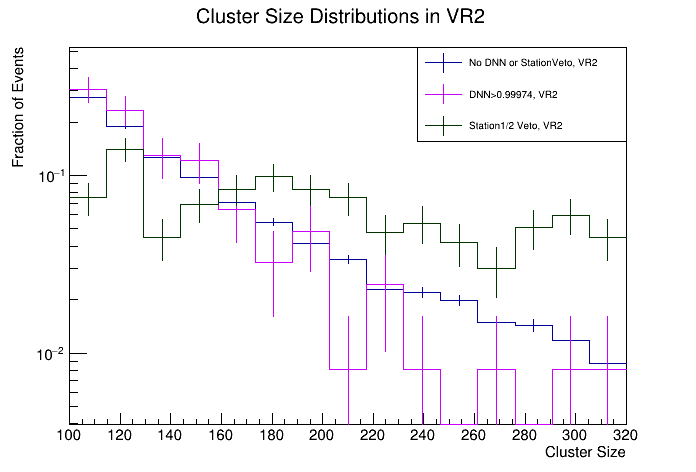

In [56]:
c = ROOT.TCanvas()
leg = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)


#no additional cuts VR2
noAdditionalCuts_VR2 = analysis_helpers.get_ROOT_hist_from_ak(clusterSize_allCutsDNN0MT, xlow=100, xhigh=320, nbins=15)

noAdditionalCuts_VR2.Scale(1/noAdditionalCuts_VR2.GetSumOfWeights())
noAdditionalCuts_VR2.SetTitle("Cluster Size Distributions in VR2;Cluster Size; Fraction of Events")
noAdditionalCuts_VR2.Draw("HIST E")
leg.AddEntry(noAdditionalCuts_VR2, "No DNN or StationVeto, VR2", "lep")
noAdditionalCuts_VR2.SetDirectory(0)

# #no additional cuts VR2
# noAdditionalCuts_VR2 = analysis_helpers.get_ROOT_hist_from_ak(clusterSize_allCutsDNN0MT, xlow=100, xhigh=320, nbins=15)
# noAdditionalCuts_VR2.Scale(1/noAdditionalCuts_VR2.GetSumOfWeights())
# noAdditionalCuts_VR2.SetLineColor(ROOT.kRed)
# noAdditionalCuts_VR2.Draw("SAME HIST E")
# leg.AddEntry(noAdditionalCuts_VR2, "No DNN or StationVeto, VR2", "lep")

#DNN VR1
DNN_VR2 = analysis_helpers.get_ROOT_hist_from_ak(clusterSize_allCutsDNNMT, xlow=100, xhigh=320, nbins=15)
DNN_VR2.Scale(1/DNN_VR2.GetSumOfWeights())
DNN_VR2.Draw("SAME HIST E")
DNN_VR2.SetLineColor(ROOT.kViolet)
leg.AddEntry(DNN_VR2, "DNN>0.99974, VR2", "lep")
DNN_VR2.SetDirectory(0)

#Station1/2 Veto VR2
StationVeto_VR2 = analysis_helpers.get_ROOT_hist_from_ak(clusterSize_allCuts, xlow=100, xhigh=320, nbins=15)
StationVeto_VR2.Scale(1/StationVeto_VR2.GetSumOfWeights())
StationVeto_VR2.Draw("SAME HIST E")
StationVeto_VR2.SetLineColor(ROOT.kGreen+4)
leg.AddEntry(StationVeto_VR2, "Station1/2 Veto, VR2", "lep")
StationVeto_VR2.SetDirectory(0)


leg.Draw("SAME")

c.Draw("")
c.SetLogy()

### Check closure when scanning cluster size

In [57]:
def computeExpected(clusterSize, deltaPhi, clusterSizeCut, deltaPhiCut):
    B = ak.count_nonzero((deltaPhi<deltaPhiCut) & (clusterSize>clusterSizeCut))
    C = ak.count_nonzero((deltaPhi>deltaPhiCut) & (clusterSize<clusterSizeCut))
    A = ak.count_nonzero((deltaPhi<deltaPhiCut) & (clusterSize<clusterSizeCut))
    D_exp = B/A*C
    A_unc = np.sqrt(A)
    B_unc = np.sqrt(B)
    C_unc = np.sqrt(C)
    D_exp_unc = D_exp * np.sqrt((A_unc/A)**2+(B_unc/B)**2 + (C_unc/C)**2)
    return D_exp, D_exp_unc

def computeActual(clusterSize, deltaPhi, clusterSizeCut, deltaPhiCut):
    D = ak.count_nonzero((deltaPhi>deltaPhiCut) & (clusterSize>clusterSizeCut))
    D_unc = np.sqrt(D)
    return D, D_unc

### VR1, DNN>0.99975

In [58]:
size_array = clusterSize_allCutsDNN
dPhi_array = dPhi_allCutsDNN

In [59]:
#check closure for DNN in VR1
dPhiCut=2
expected, expected_unc, measured, measured_unc = [],[],[],[]
size_scan = np.arange(130, 300, 5)
for sizeCut in size_scan:
    expect, expect_unc = computeExpected(size_array, dPhi_array, sizeCut, dPhiCut)
    actual, actual_unc = computeActual(size_array, dPhi_array, sizeCut, dPhiCut)
    expected.append(expect); expected_unc.append(expect_unc); measured.append(actual); measured_unc.append(actual_unc)

Text(0, 0.5, '# of Events')

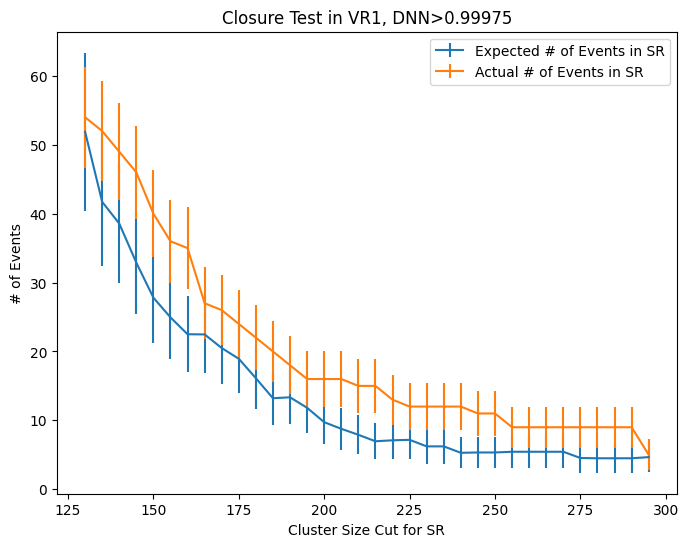

In [60]:
plt.figure(figsize=(8,6))
plt.errorbar(size_scan, expected, yerr = expected_unc, label = "Expected # of Events in SR")
plt.errorbar(size_scan, measured, yerr = measured_unc, label = "Actual # of Events in SR")
plt.legend()
plt.title("Closure Test in VR1, DNN>0.99975")
plt.xlabel("Cluster Size Cut for SR")
plt.ylabel("# of Events")

### VR2, DNN>0.99975

In [61]:
size_array = clusterSize_allCutsDNNMT
dPhi_array = dPhi_allCutsDNNMT

In [62]:
#check closure for DNN in VR1
dPhiCut=2
expected, expected_unc, measured, measured_unc = [],[],[],[]
size_scan = np.arange(130, 300, 5)
for sizeCut in size_scan:
    expect, expect_unc = computeExpected(size_array, dPhi_array, sizeCut, dPhiCut)
    actual, actual_unc = computeActual(size_array, dPhi_array, sizeCut, dPhiCut)
    expected.append(expect); expected_unc.append(expect_unc); measured.append(actual); measured_unc.append(actual_unc)

Text(0, 0.5, '# of Events')

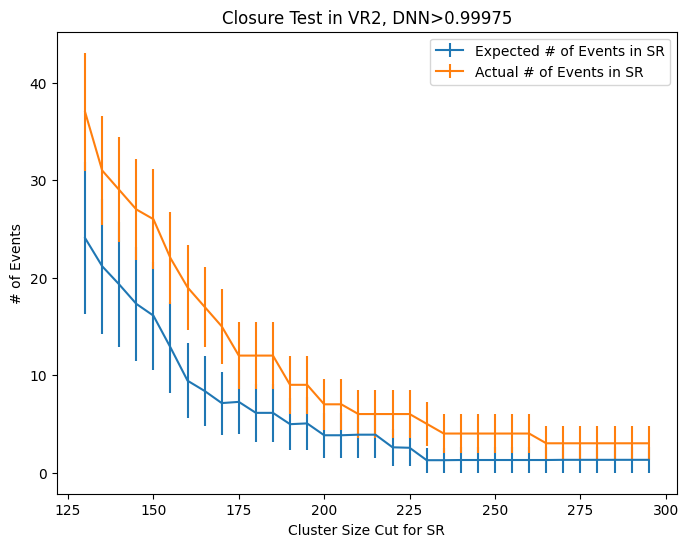

In [63]:
plt.figure(figsize=(8,6))
plt.errorbar(size_scan, expected, yerr = expected_unc, label = "Expected # of Events in SR")
plt.errorbar(size_scan, measured, yerr = measured_unc, label = "Actual # of Events in SR")
plt.legend()
plt.title("Closure Test in VR2, DNN>0.99975")
plt.xlabel("Cluster Size Cut for SR")
plt.ylabel("# of Events")

### Station 12 Veto, VR1

In [64]:
size_array = clusterSize_allCuts
dPhi_array = dPhi_allCuts

In [65]:
#check closure for DNN in VR1
dPhiCut=2
expected, expected_unc, measured, measured_unc = [],[],[],[]
size_scan = np.arange(130, 300, 5)
for sizeCut in size_scan:
    expect, expect_unc = computeExpected(size_array, dPhi_array, sizeCut, dPhiCut)
    actual, actual_unc = computeActual(size_array, dPhi_array, sizeCut, dPhiCut)
    expected.append(expect); expected_unc.append(expect_unc); measured.append(actual); measured_unc.append(actual_unc)

Text(0, 0.5, '# of Events')

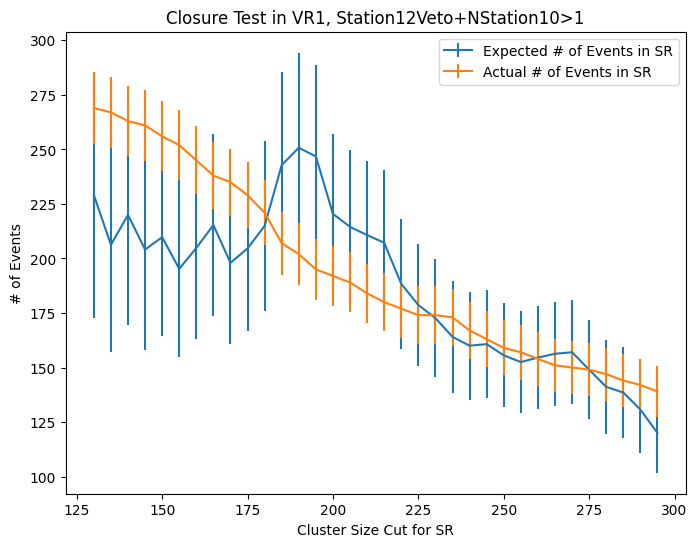

In [66]:
plt.figure(figsize=(8,6))
plt.errorbar(size_scan, expected, yerr = expected_unc, label = "Expected # of Events in SR")
plt.errorbar(size_scan, measured, yerr = measured_unc, label = "Actual # of Events in SR")
plt.legend()
plt.title("Closure Test in VR1, Station12Veto+NStation10>1")
plt.xlabel("Cluster Size Cut for SR")
plt.ylabel("# of Events")

### Station 12 Veto, VR1

In [67]:
size_array = clusterSize_allCutsMT
dPhi_array = dPhi_allCutsMT

In [68]:
#check closure for DNN in VR1
dPhiCut=2
expected, expected_unc, measured, measured_unc = [],[],[],[]
size_scan = np.arange(130, 300, 5)
for sizeCut in size_scan:
    expect, expect_unc = computeExpected(size_array, dPhi_array, sizeCut, dPhiCut)
    actual, actual_unc = computeActual(size_array, dPhi_array, sizeCut, dPhiCut)
    expected.append(expect); expected_unc.append(expect_unc); measured.append(actual); measured_unc.append(actual_unc)

Text(0, 0.5, '# of Events')

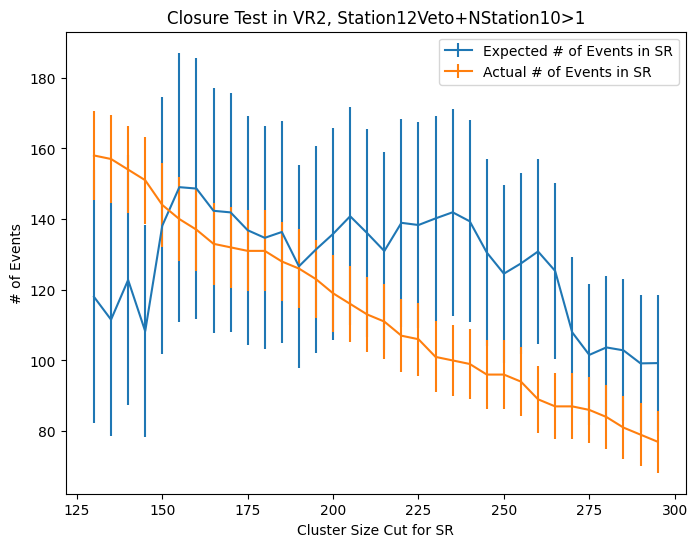

In [69]:
plt.figure(figsize=(8,6))
plt.errorbar(size_scan, expected, yerr = expected_unc, label = "Expected # of Events in SR")
plt.errorbar(size_scan, measured, yerr = measured_unc, label = "Actual # of Events in SR")
plt.legend()
plt.title("Closure Test in VR2, Station12Veto+NStation10>1")
plt.xlabel("Cluster Size Cut for SR")
plt.ylabel("# of Events")

### Check closure for looser DNN WP

In [70]:
clusterSize_allCutsDNNLoose, dPhi_allCutsDNNLoose = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, DNN_cut=0.99)
clusterSize_allCutsDNNLooseMT, dPhi_allCutsDNNLooseMT = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsMedium', failID = 'tauIsTight', blind=False, DNN_cut=0.99)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44055 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45923 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with sci

In [80]:
print(len(clusterSize_allCutsDNNLoose))
print(len(clusterSize_allCutsDNNLooseMT))

3182
1759


In [71]:
h2d_DNNLoose = ROOT.TH2D("With DNN>0.99", "ABCD in Loose-Medium Tau ID VR;ClusterSize;DeltaPhi(cluster, tau)", 20, 100, 320, 20, 0, 3.2)
for x, y in zip(clusterSize_allCutsDNNLoose, dPhi_allCutsDNNLoose):
    h2d_DNNLoose.Fill(x,y)

h2d_DNNLooseMT = ROOT.TH2D("With DNN>0.99", "ABCD in Medium-Tight Tau ID VR;ClusterSize;DeltaPhi(cluster, tau)", 20, 100, 320, 20, 0, 3.2)
for x, y in zip(clusterSize_allCutsDNNLooseMT, dPhi_allCutsDNNLooseMT):
    h2d_DNNLooseMT.Fill(x,y)

Warning in <TROOT::Append>: Replacing existing TH1: With DNN>0.99 (Potential memory leak).


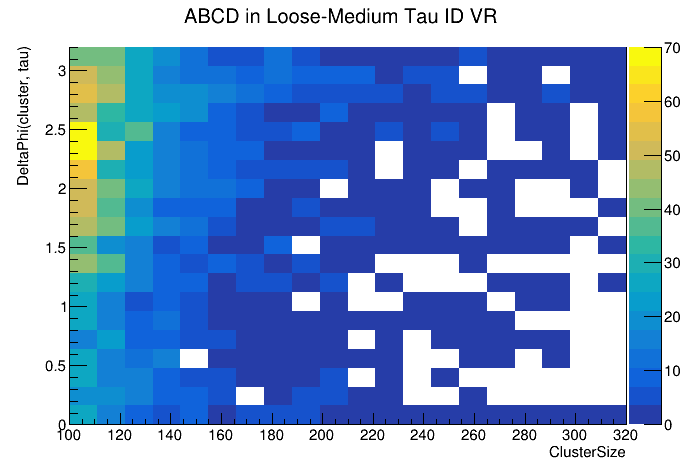

In [72]:
c = ROOT.TCanvas()
h2d_DNNLoose.Draw("profcolz")
c.Draw()

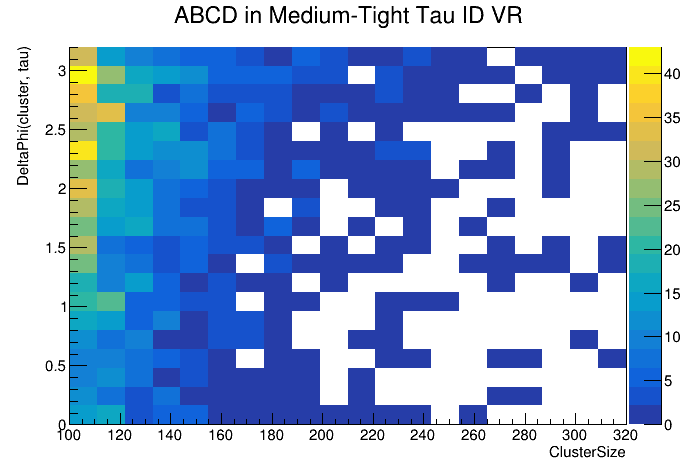

In [73]:
c = ROOT.TCanvas()
h2d_DNNLooseMT.Draw("profcolz")
c.Draw()

### Looser DNN, VR1

In [74]:
size_array = clusterSize_allCutsDNNLoose
dPhi_array = dPhi_allCutsDNNLoose

In [75]:
#check closure for DNN in VR1
dPhiCut=2
expected, expected_unc, measured, measured_unc = [],[],[],[]
size_scan = np.arange(130, 300, 5)
for sizeCut in size_scan:
    expect, expect_unc = computeExpected(size_array, dPhi_array, sizeCut, dPhiCut)
    actual, actual_unc = computeActual(size_array, dPhi_array, sizeCut, dPhiCut)
    expected.append(expect); expected_unc.append(expect_unc); measured.append(actual); measured_unc.append(actual_unc)

Text(0, 0.5, '# of Events')

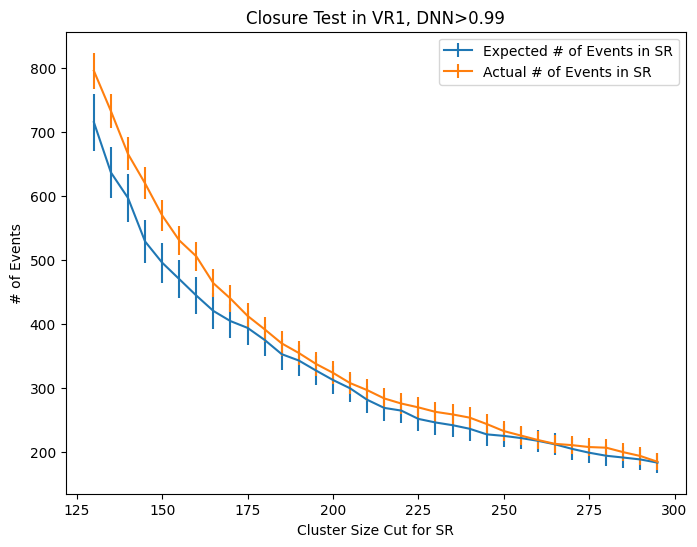

In [76]:
plt.figure(figsize=(8,6))
plt.errorbar(size_scan, expected, yerr = expected_unc, label = "Expected # of Events in SR")
plt.errorbar(size_scan, measured, yerr = measured_unc, label = "Actual # of Events in SR")
plt.legend()
plt.title("Closure Test in VR1, DNN>0.99")
plt.xlabel("Cluster Size Cut for SR")
plt.ylabel("# of Events")

### Looser DNN, VR2

In [77]:
size_array = clusterSize_allCutsDNNLooseMT
dPhi_array = dPhi_allCutsDNNLooseMT

In [78]:
#check closure for DNN in VR1
dPhiCut=2
expected, expected_unc, measured, measured_unc = [],[],[],[]
size_scan = np.arange(130, 300, 5)
for sizeCut in size_scan:
    expect, expect_unc = computeExpected(size_array, dPhi_array, sizeCut, dPhiCut)
    actual, actual_unc = computeActual(size_array, dPhi_array, sizeCut, dPhiCut)
    expected.append(expect); expected_unc.append(expect_unc); measured.append(actual); measured_unc.append(actual_unc)

Text(0, 0.5, '# of Events')

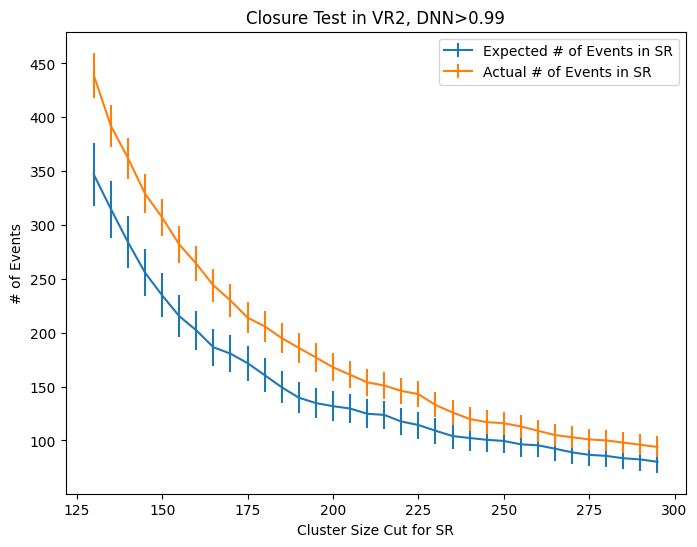

In [79]:
plt.figure(figsize=(8,6))
plt.errorbar(size_scan, expected, yerr = expected_unc, label = "Expected # of Events in SR")
plt.errorbar(size_scan, measured, yerr = measured_unc, label = "Actual # of Events in SR")
plt.legend()
plt.title("Closure Test in VR2, DNN>0.99")
plt.xlabel("Cluster Size Cut for SR")
plt.ylabel("# of Events")